In [10]:
import pandas as pd

In [13]:
%cd ..
%pwd

/Users/smcaleese/Documents/masters-thesis-code


/Users/smcaleese/Documents/masters-thesis-code/.env/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


'/Users/smcaleese/Documents/masters-thesis-code'

In [23]:
df = pd.read_csv("output/closs-output.csv")
df.head()

,original_text,original_score,original_perplexity,counterfactual_text,counterfactual_score,counterfactual_perplexity,found_flip,frac_tokens_same
0,the film 's center will not hold .,0.001705,829.773926,the film 's center will not lock .,0.018207,1392.279419,False,0.875000
1,though avary has done his best to make somethi...,0.001053,243.244873,though avary has done his best to make somethi...,0.973669,301.035919,True,0.962963
2,despite what anyone believes about the goal of...,0.999483,73.716217,despite what anyone believes about the goal of...,0.136417,128.214050,True,0.971429
3,"so stupid , so ill-conceived , so badly drawn ...",0.000859,127.008018,"so stupid , so ill-conceived , so well beautif...",0.729221,189.074265,True,0.833333
4,"it 's not horrible , just horribly mediocre .",0.001413,411.870331,"it 's not horrible , just horribly medio fanta...",0.752315,1189.188110,True,0.700000


In [24]:
original_sentences = df["original_text"][:10].tolist()
counterfactual_sentences = df["counterfactual_text"][:10].tolist()

## Fraction of tokens the same

In [25]:
def calculate_frac_tokens_same(original_text, counterfactual_text):
    orig_tokens = original_text.split()
    cf_tokens = counterfactual_text.split()
    matching = sum(o == c for o, c in zip(orig_tokens, cf_tokens))
    total = max(len(orig_tokens), len(cf_tokens))
    return matching / total if total else 0

In [26]:
for original_text, counterfactual_text in zip(original_sentences, counterfactual_sentences):
    label_width = 20
    print(f"{'original text'.ljust(label_width)}: {original_text}")
    print(f"{'counterfactual_text'.ljust(label_width)}: {counterfactual_text}")
    frac_tokens_same = calculate_frac_tokens_same(original_text, counterfactual_text)
    print(f"frac tokens same: {frac_tokens_same:.2f}")
    print()


original text       : the film 's center will not hold .
counterfactual_text : the film 's center will not lock .
frac tokens same: 0.88

original text       : though avary has done his best to make something out of ellis ' nothing novel , in the end , his rules is barely worth following .
counterfactual_text : though avary has done his best to make something out of ellis ' nothing novel , in the end , his rules is . worth following .
frac tokens same: 0.96

original text       : despite what anyone believes about the goal of its makers , the show ... represents a spectacular piece of theater , and there 's no denying the talent of the creative forces behind it .
counterfactual_text : despite what anyone believes about the goal of its makers , the show ... represents a spectacular piece of theater , and there 's no holding the talent of the creative forces behind it .
frac tokens same: 0.97

original text       : so stupid , so ill-conceived , so badly drawn , it created whole new leve

## Cosine similarity

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def calculate_cosine_similarity(sentence1, sentence2):
    # Create a list of sentences
    sentences = [sentence1, sentence2]

    # Create the CountVectorizer object
    vectorizer = CountVectorizer()

    # Fit and transform the sentences
    sentence_vectors = vectorizer.fit_transform(sentences)

    # Calculate cosine similarity
    cosine_sim = cosine_similarity(sentence_vectors)

    # Return the similarity between the two sentences
    return cosine_sim[0][1]

sentence1 = "The quick brown fox jumps over the lazy dog"
sentence2 = "The lazy dog is jumped over by the quick brown fox"

similarity = calculate_cosine_similarity(sentence1, sentence2)
print(f"The cosine similarity between the two sentences is: {similarity:.4f}")

The cosine similarity between the two sentences is: 0.8362


## Levenshtein distance

In [7]:
import Levenshtein

# Example strings
str1 = "kitten"
str2 = "I really"

# Calculate Levenshtein distance
distance = Levenshtein.distance(str1, str2)

print(f"The Levenshtein distance between '{str1}' and '{str2}' is {distance}.")

The Levenshtein distance between 'kitten' and 'sitting' is 3.


In [9]:
import textdistance

# Example strings
str1 = "kitten"
str2 = "sitting"

# Calculate normalized Levenshtein distance
# normalized_distance = textdistance.levenshtein.normalized_distance(str1, str2)
normalized_distance = textdistance.levenshtein(str1, str2)

print(f"The normalized Levenshtein distance between '{str1}' and '{str2}' is {normalized_distance}.")


The normalized Levenshtein distance between 'kitten' and 'sitting' is 3.


In [27]:
for original_text, counterfactual_text in zip(original_sentences, counterfactual_sentences):
    label_width = 20
    print(f"{'original text'.ljust(label_width)}: {original_text}")
    print(f"{'counterfactual_text'.ljust(label_width)}: {counterfactual_text}")
    levenshtein_distance = textdistance.levenshtein.normalized_distance(original_text, counterfactual_text)
    print(f"levenstein distance: {levenshtein_distance:.2f}")
    print()


original text       : the film 's center will not hold .
counterfactual_text : the film 's center will not lock .
levenstein distance: 0.09

original text       : though avary has done his best to make something out of ellis ' nothing novel , in the end , his rules is barely worth following .
counterfactual_text : though avary has done his best to make something out of ellis ' nothing novel , in the end , his rules is . worth following .
levenstein distance: 0.05

original text       : despite what anyone believes about the goal of its makers , the show ... represents a spectacular piece of theater , and there 's no denying the talent of the creative forces behind it .
counterfactual_text : despite what anyone believes about the goal of its makers , the show ... represents a spectacular piece of theater , and there 's no holding the talent of the creative forces behind it .
levenstein distance: 0.02

original text       : so stupid , so ill-conceived , so badly drawn , it created whole

## Calculate Levenshtein distance

In [2]:
%cd ..
%pwd

/Users/smcaleese/Documents/masters-thesis-code


/Users/smcaleese/Documents/masters-thesis-code/.env/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


'/Users/smcaleese/Documents/masters-thesis-code'

In [20]:
import pandas as pd

df = pd.read_csv("output/polyjuice-output.csv")
df.head()

,original_text,original_score,original_perplexity,counterfactual_text,counterfactual_score,counterfactual_perplexity,found_flip,frac_tokens_same
0,the film 's center will not hold .,0.001705,829.773926,the film 's center EMPTY not hold .,0.003161,6128.463379,False,0.875000
1,though avary has done his best to make somethi...,0.001053,243.244873,though avary has done his best to make somethi...,0.001375,142.127167,False,0.444444
2,despite what anyone believes about the goal of...,0.999483,73.716217,despite what anyone believes about the goal of...,0.999567,69.715416,False,0.971429
3,"so stupid , so ill-conceived , so badly drawn ...",0.000859,127.008018,"so stupid , so ill-conceived , so badly drawn ...",0.021347,114.451698,False,0.944444
4,"it 's not horrible , just horribly mediocre .",0.001413,411.870331,"it is not horrible , just horribly mediocre .",0.001479,365.104187,False,0.888889


In [21]:
df = df.drop(["frac_tokens_same"], axis=1)
df.head()

,original_text,original_score,original_perplexity,counterfactual_text,counterfactual_score,counterfactual_perplexity,found_flip
0,the film 's center will not hold .,0.001705,829.773926,the film 's center EMPTY not hold .,0.003161,6128.463379,False
1,though avary has done his best to make somethi...,0.001053,243.244873,though avary has done his best to make somethi...,0.001375,142.127167,False
2,despite what anyone believes about the goal of...,0.999483,73.716217,despite what anyone believes about the goal of...,0.999567,69.715416,False
3,"so stupid , so ill-conceived , so badly drawn ...",0.000859,127.008018,"so stupid , so ill-conceived , so badly drawn ...",0.021347,114.451698,False
4,"it 's not horrible , just horribly mediocre .",0.001413,411.870331,"it is not horrible , just horribly mediocre .",0.001479,365.104187,False


Calculate the new similarity metric using the Levenshtein distance.

In [22]:
# You can calculate it using original_text and counterfactual_text
import textdistance

def get_levenstein_similarity_score(row):
    original_text, counterfactual_text = row["original_text"], row["counterfactual_text"]
    return 1 - textdistance.levenshtein.normalized_distance(original_text, counterfactual_text)

df["levenshtein_similarity_score"] = df.apply(get_levenstein_similarity_score, axis=1)
df.head()

,original_text,original_score,original_perplexity,counterfactual_text,counterfactual_score,counterfactual_perplexity,found_flip,levenshtein_similarity_score
0,the film 's center will not hold .,0.001705,829.773926,the film 's center EMPTY not hold .,0.003161,6128.463379,False,0.857143
1,though avary has done his best to make somethi...,0.001053,243.244873,though avary has done his best to make somethi...,0.001375,142.127167,False,0.830769
2,despite what anyone believes about the goal of...,0.999483,73.716217,despite what anyone believes about the goal of...,0.999567,69.715416,False,0.947917
3,"so stupid , so ill-conceived , so badly drawn ...",0.000859,127.008018,"so stupid , so ill-conceived , so badly drawn ...",0.021347,114.451698,False,0.952941
4,"it 's not horrible , just horribly mediocre .",0.001413,411.870331,"it is not horrible , just horribly mediocre .",0.001479,365.104187,False,0.977778


In [23]:
df.to_csv("output/polyjuice-output-2.csv", index=False)

## Test different score metrics

In [25]:
def calculate_perplexity_score(counterfactual_perplexity, original_perplexity):
    ratio = counterfactual_perplexity / original_perplexity
    score = 1 / ratio
    return score

import math

def perplexity_score_2(original_perplexity, counterfactual_perplexity):
    # Calculate the ratio of perplexities
    ratio = counterfactual_perplexity / original_perplexity
    
    # Define the midpoint and steepness of the sigmoid
    midpoint = 1.5  # Adjust this to shift the midpoint of the score
    steepness = 3   # Adjust this to change how quickly the score drops off

    # Calculate the score using a sigmoid function
    score = 1 / (1 + math.exp(steepness * (ratio - midpoint)))
    
    return score


Text(0, 0.5, 'Perplexity score')

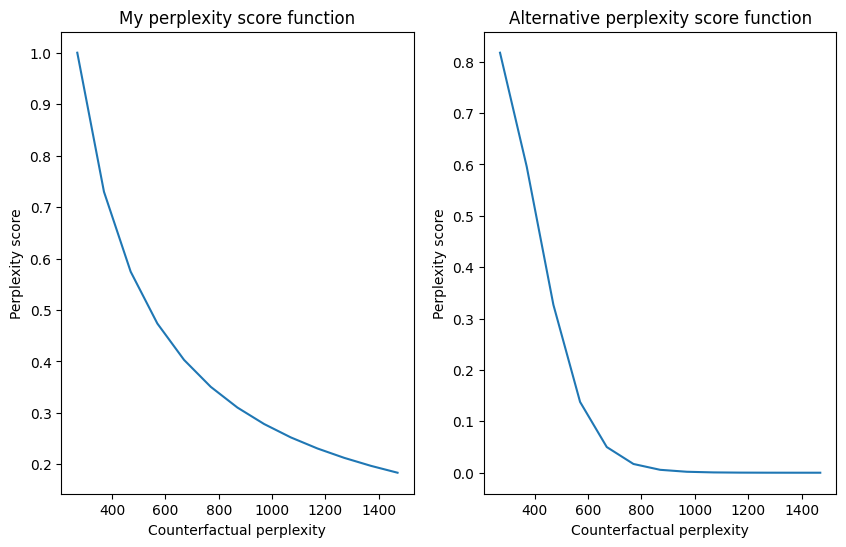

In [29]:
import numpy as np
import matplotlib.pyplot as plt

original_perplexity = 270
counterfactual_perplexities = np.arange(270, 1500, 100)

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
x1 = counterfactual_perplexities
y2 = [calculate_perplexity_score(p, original_perplexity) for p in x1]

ax[0].plot(x1, y2)
ax[0].set_title("My perplexity score function")
ax[0].set_xlabel("Counterfactual perplexity")
ax[0].set_ylabel("Perplexity score")

y2 = [perplexity_score_2(original_perplexity, p) for p in x1]
ax[1].plot(x1, y2)
ax[1].set_title("Alternative perplexity score function")
ax[1].set_xlabel("Counterfactual perplexity")
ax[1].set_ylabel("Perplexity score")


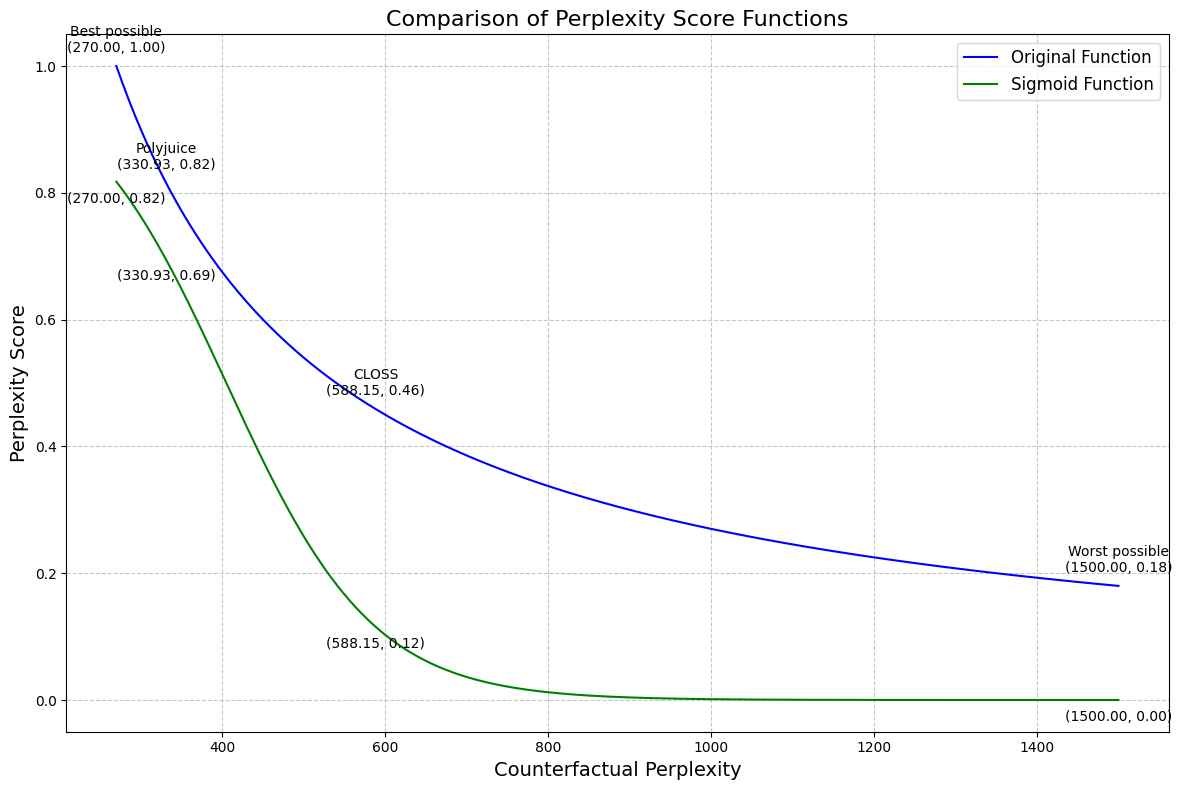

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def original_perplexity_score(counterfactual_perplexity, original_perplexity):
    ratio = counterfactual_perplexity / original_perplexity
    return 1 / ratio

def sigmoid_perplexity_score(counterfactual_perplexity, original_perplexity):
    ratio = counterfactual_perplexity / original_perplexity
    midpoint = 1.5
    steepness = 3
    return 1 / (1 + np.exp(steepness * (ratio - midpoint)))

# Set up the data
original_perplexity = 270
counterfactual_perplexities = np.linspace(270, 1500, 500)

# Calculate scores
original_scores = [original_perplexity_score(cp, original_perplexity) for cp in counterfactual_perplexities]
sigmoid_scores = [sigmoid_perplexity_score(cp, original_perplexity) for cp in counterfactual_perplexities]

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(counterfactual_perplexities, original_scores, label='Original Function', color='blue')
plt.plot(counterfactual_perplexities, sigmoid_scores, label='Sigmoid Function', color='green')

# Customize the plot
plt.title('Comparison of Perplexity Score Functions', fontsize=16)
plt.xlabel('Counterfactual Perplexity', fontsize=14)
plt.ylabel('Perplexity Score', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add text annotations for specific points
points_of_interest = [
    (270, "Best possible"),
    (330.93, "Polyjuice"),
    (588.15, "CLOSS"),
    (1500, "Worst possible")
]

for cp, label in points_of_interest:
    original_score = original_perplexity_score(cp, original_perplexity)
    sigmoid_score = sigmoid_perplexity_score(cp, original_perplexity)
    plt.annotate(f"{label}\n({cp:.2f}, {original_score:.2f})", (cp, original_score), 
                 textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f"({cp:.2f}, {sigmoid_score:.2f})", (cp, sigmoid_score), 
                 textcoords="offset points", xytext=(0,-15), ha='center')

# Show the plot
plt.tight_layout()
plt.show()

# Optionally, save the plot as an image file
# plt.savefig('perplexity_score_comparison.png', dpi=300, bbox_inches='tight')